<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/main/ANALISIS%20FLUIDOS%20GASEOSOS%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from operator import truediv
import numpy as np
import pandas as pd
url='https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/Trend280922.csv'
datos = pd.read_csv(url,sep=";",decimal=",",index_col=0)
df=pd.DataFrame(datos)
n=160
#df.head()
#df.info()
# segmentan para la curva
for i in range(1,960):
  if i<=160:df1=df.iloc[:160]
  if (i>160 and i<=320):df2=df.iloc[160:320]
  if (i>320 and i<=480):df3=df.iloc[320:480]
  if (i>480 and i<=640):df4=df.iloc[480:640]
  if (i>640 and i<=800):df5=df.iloc[640:800]
  if (i>800 and i<=960):df6=df.iloc[800:960]

In [70]:

import matplotlib.pyplot as plt
def GRAFICAR_Q (T):
  fig, ax = plt.subplots(1, figsize=(50,15))
  fig.suptitle('CAUDAL DE ENTRADA SIDERCA',fontsize=30)
  q=T.FQI161/1000
  p=T.PIR161
  x=T.Time
  bar1=np.arange(len(T.Time))
  #ax.plot(x,q ,color="Blue",label="FQI_161 entrada")
  ax.bar(bar1,T.FQI161/1000,0.6,color="red",alpha=0.5,label="Total(FQI161)")
  ax.plot(x,p ,color="blue",label="PIR_161 entrada")
  #e,=ax.plot(x,q,'o',color="black")
  e,=ax.plot(x,p,'o',color="black")
  plt.grid(visible=True,which='major',color='#666666',linestyle='-')
  fig.autofmt_xdate()
  ax.legend(fontsize=15)
  plt.show()

# ***Trends de caudal y presión caudalimetro entrada.***

In [98]:
T=df1


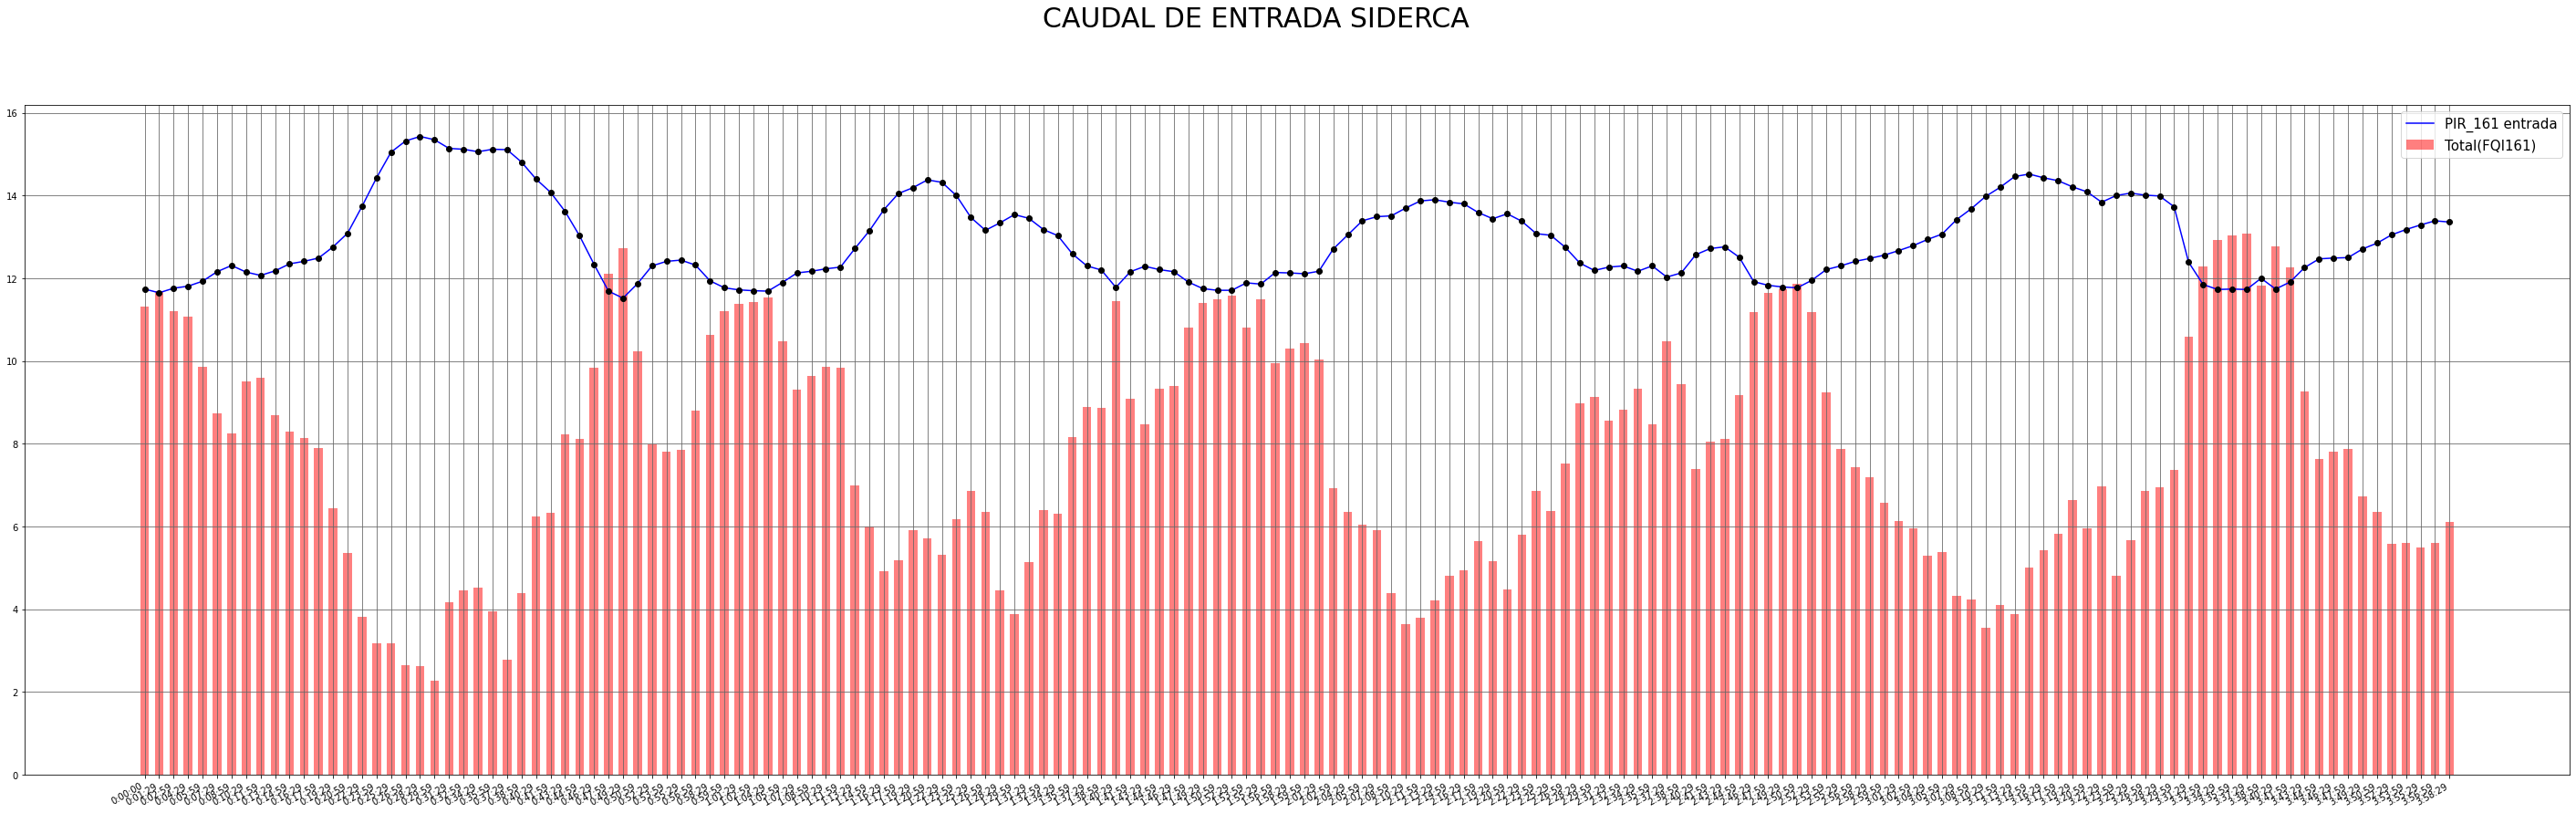

In [99]:
GRAFICAR_Q(T)

# ***Analisis de maximos y minimos***

In [ ]:
print(df.FQI161.describe(),df.PIR161.describe())


# ***Muestreo:***

In [79]:
n_muestras=10
dfmax=df.nlargest(n_muestras,'PIR161')
#print(dfmax)
dfmin=df.nsmallest(n_muestras,'PIR161')
#print(dfmin)
dfa=(df.loc[df.loc[:, 'PIR161'] <= 12])
print(dfa.nlargest(n_muestras,'PIR161'))

             Date      Time    FQI161  PIR161   FQI165   FQI169  FQI177  \
indice                                                                    
147     28/9/2168   3:38:59  11813.39   12.00  4549.33  5057.89  326.80   
233     28/9/2254   5:47:59  11097.13   11.99  5494.92  3592.00  298.13   
362     28/9/2383   9:01:29  10829.82   11.99  6241.72  4434.60   31.00   
398     28/9/2419   9:55:29  10142.53   11.99  6275.17  2518.88  178.00   
819     28/9/2840  20:26:59  10899.71   11.99  4541.67  4506.00  143.76   
368     28/9/2389   9:10:29  11467.00   11.98  4505.44  5101.00  160.33   
569     28/9/2590  14:11:59   9967.41   11.98  4499.36  3543.50   51.69   
394     28/9/2415   9:49:29  10417.33   11.96  6312.93  2598.00  167.25   
811     28/9/2832  20:14:59  10785.94   11.96  6286.59  3420.22  168.75   
116     28/9/2137   2:52:29  11181.06   11.95  6384.82  2546.89  211.36   

        FQI173   FQI151  
indice                   
147     232.22  1647.15  
233     145.57  1566.

In [91]:
def GRAFICO_BARRA(B):
  fig3, (ax)= plt.subplots(1, figsize=(40,20))#(ax,ax0)

  bar1=np.arange(len(B.Time))
  #bar2=[i+0.3 for i in bar1]
  w=0.6
  #ax.bar(bar1,B.FQI161/1000,w-0.1,color="red",alpha=0.5,label="Total(FQI161)")
  ax.bar(bar1,B.FQI165/1000,w,color="blue",label="EAF4(FQI165)")
  ax.bar(bar1,B.FQI169/1000,w,bottom=B.FQI165/1000,color="green")
  ax.bar(bar1,B.FQI177/1000,w,bottom=(B.FQI165+B.FQI169)/1000,color="yellow")
  ax.bar(bar1,B.FQI173/1000,w,bottom=(B.FQI165+B.FQI169+B.FQI177)/1000,color="violet")
  ax.bar(bar1,B.FQI151/1000,w,bottom=(B.FQI165+B.FQI169+B.FQI177+B.FQI173)/1000,color="grey")
  plt.xticks(bar1,B.Time)
  ax.grid(visible=True,which='major',color='#666666',linestyle='-')
  ax.plot(bar1,B.PIR161)
  #ax0.plot(bar1,B.PIR161)
  r,=ax.plot(B.Time,B.PIR161,'o',color="black")
  #ax0.grid(visible=True,which='major',color='#666666',linestyle='-')
  #r,=ax0.plot(B.Time,B.PIR161,'o',color="black")
  fig3.autofmt_xdate()
  ax.legend(fontsize=15)
  plt.show()

Grafica de consumos y presion segun consumos

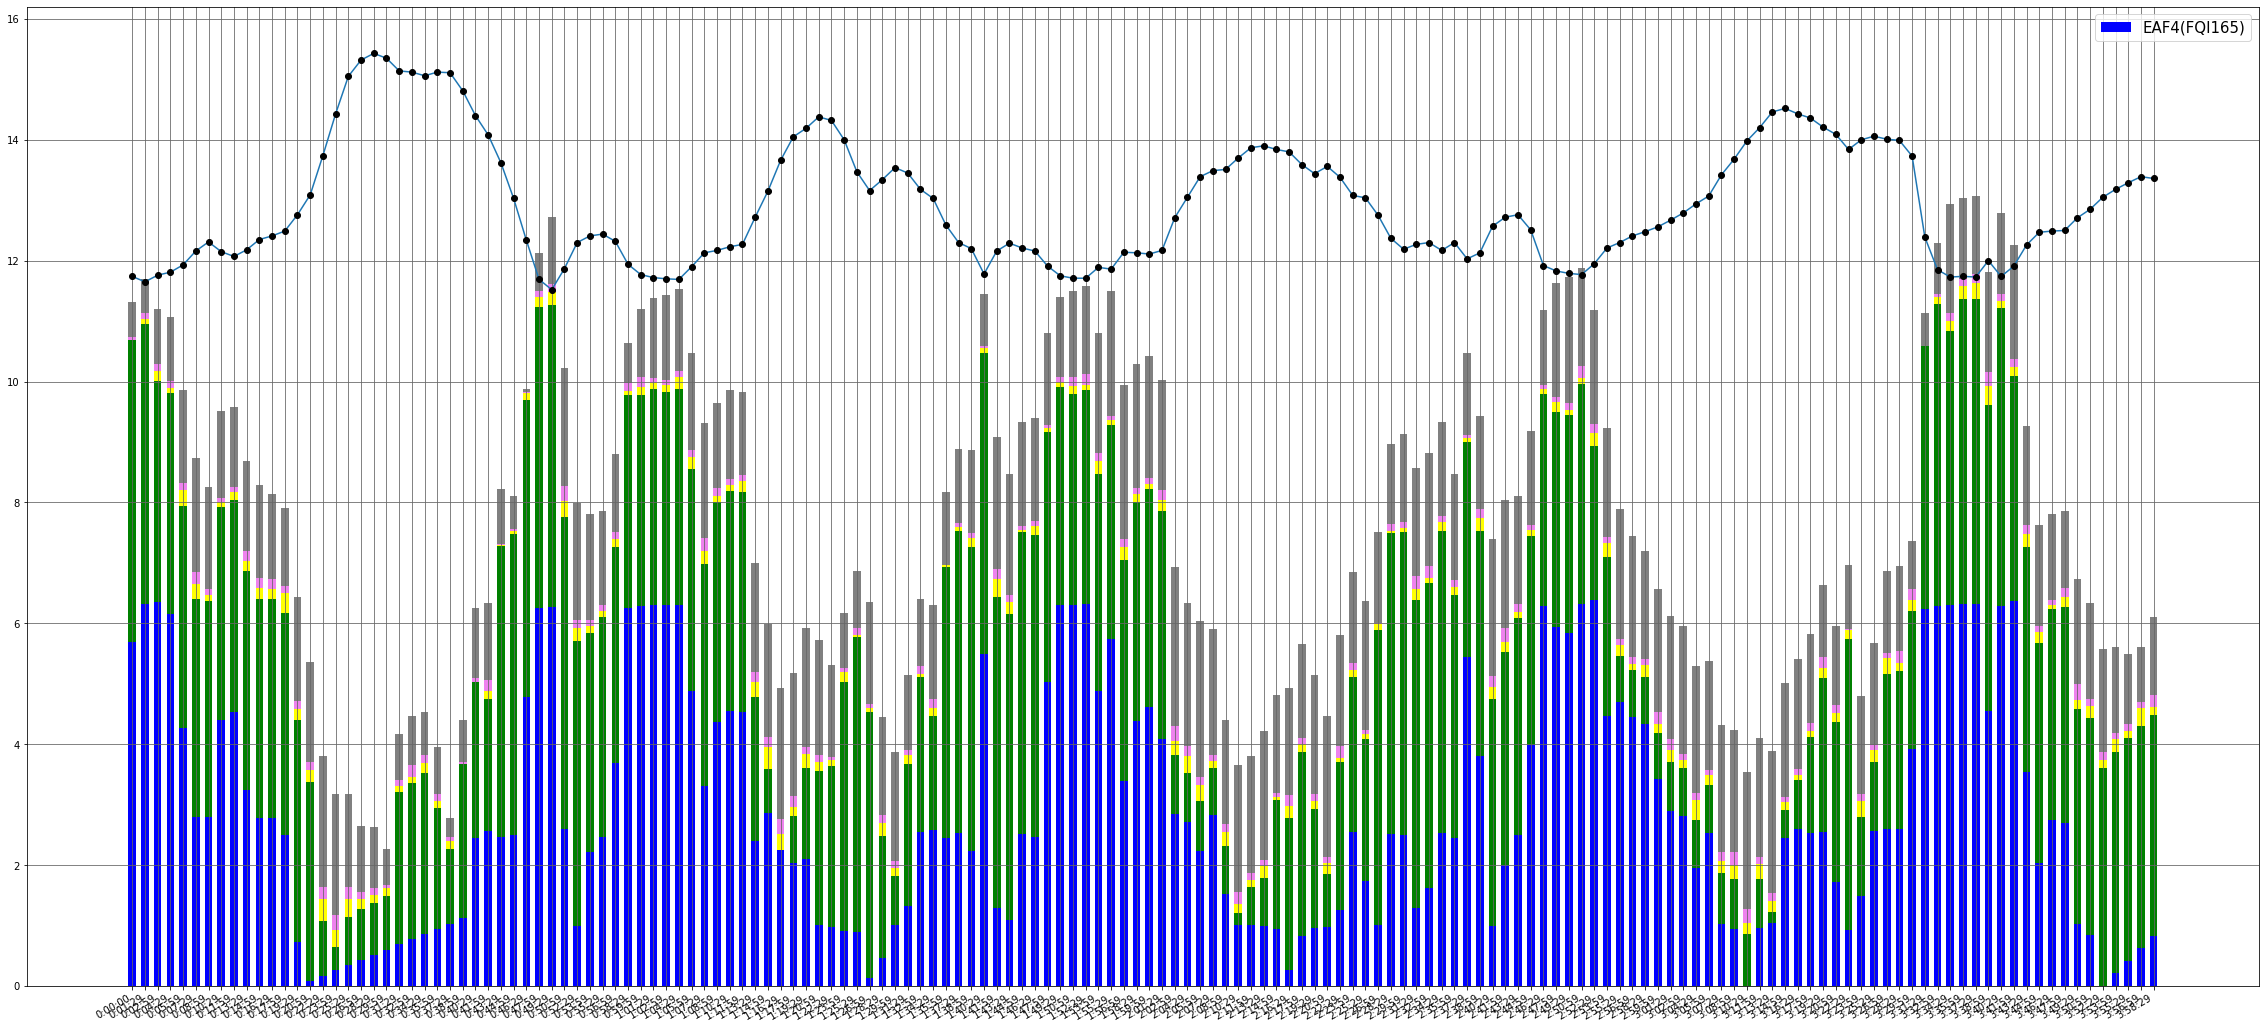

In [94]:
b=df1

GRAFICO_BARRA(b)